In [14]:
import os
import sys
import time
from threading import Thread, ThreadError

import cv2
import numpy as np
from matplotlib import pyplot as plt

from IPython.display import clear_output

In [2]:
PLAYLIST_URI = 'https://sochi.camera:8081/cam_274/tracks-v1/mono.m3u8'

In [3]:
import m3u8

playlist = m3u8.load(PLAYLIST_URI, verify_ssl=False)  # this could also be an absolute filename
print(playlist.segments)
print(playlist.target_duration)

#EXT-X-PROGRAM-DATE-TIME:2021-02-16T16:06:42+00:00
#EXTINF:6.01,
2021/02/16/16/06/42-06010.ts
#EXTINF:6,
2021/02/16/16/06/48-06000.ts
#EXTINF:6,
2021/02/16/16/06/54-06000.ts
#EXTINF:6.01,
2021/02/16/16/07/00-06010.ts
7.0


In [4]:
class AsyncCapture(object):
    frame = None 
    status = None

    def __init__(self, src=0, output_fps=1/24, buffer_size=1):
        self.capture = cv2.VideoCapture(src)
        self.capture.set(cv2.CAP_PROP_BUFFERSIZE, buffer_size)

        self.FPS = output_fps
        self.FPS_MS = int(self.FPS * 1000)

        # Start frame retrieval thread
        self.thread = Thread(target=self.update, args=())
        self.thread.daemon = True
        self.thread.start()

    def update(self):
        while True:
            if self.capture.isOpened():
                (self.status, self.frame) = self.capture.read()
            time.sleep(self.FPS)

    def get_frame(self):
        if self.status:
            return self.frame

In [ ]:
tCap = AsyncCapture(PLAYLIST_URI)

time.sleep(10)
print(type(tCap.get_frame()))

plt.imshow(self.frame)
plt.show()
cv2.waitKey(self.FPS_MS)

while True:
    clear_output(wait=True)
    plt.imshow(tCap.get_frame)
    plt.show()
    cv2.waitKey(self.FPS_MS)
    time.sleep(1)

TypeError: Invalid shape () for image data

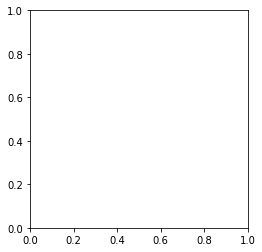

In [15]:
cap = AsyncCapture(PLAYLIST_URI)

# deadline = time.time() + 1
# while time.time() < deadline:

while True:
    #cap.set(cv2.CAP_PROP_POS_FRAMES, 8)
    # read one frame
    
    time.sleep(1)
    
    

cap.release()